In [1]:
__author__ = "@Tssp"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18

In [7]:
# Parameters and Constants:
delta, asc = np.loadtxt('Data/citaold2h/python/delta_asc.txt')
delta = delta.tolist()
delta[-3] = Decimal('0.7100')
asc = asc.tolist()
mass = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
kx = 2*np.pi/lambd
Ix = 6042 * (1e4 / Eh * to * ao**2)
Vx = alpha * Ix # a.u
Ix = Vx/alpha
wx = np.sqrt( 2 * Vx * kx**2 / mass)       
dho = np.sqrt(2 / (mass * wx))
x = dho / asc
print('wx [u.a]: ', wx/to)
print('dho [u.a]: ', dho)

wx [u.a]:  2355263.4168450045
dho [u.a]:  1656.7720420125386


In [8]:
delta

[0.708,
 0.70805,
 0.7081,
 0.70815,
 0.7082,
 0.70825,
 0.7083,
 0.70835,
 0.7084,
 0.70845,
 0.7085,
 0.70855,
 0.7086,
 0.70865,
 0.7087,
 0.70875,
 0.7088,
 0.70885,
 0.7089,
 0.70895,
 0.709,
 0.70905,
 0.7091,
 0.70915,
 0.7092,
 0.70925,
 0.7093,
 0.70935,
 0.7094,
 0.70945,
 0.7095,
 0.70955,
 0.7096,
 0.70965,
 0.7097,
 0.70975,
 0.7098,
 0.70985,
 0.7099,
 0.70995,
 Decimal('0.7100'),
 0.7101,
 0.7102]

In [9]:
print(os.getcwd())
folder_path = "Data/citaold2h/eva/ix6042_iy4993_iz50/"

/Users/tssp/PhD/Ultracold_Atoms_src


In [10]:
Data = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_b_x20000_y20000_z20000_152rm8g2l50m10_102CM8g1L50M10_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix5505_iy4993_iz50_LiLi_a3Sup_{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_500-800_75b.eva'))
    except:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_b_x20000_y20000_z20000_152rm8g2l50m10_102CM8g1L50M10_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix5505_iy4993_iz50_LiLi_a3Sup_{d}0_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_500-800_75b.eva'))

OSError: Data/citaold2h/eva/ix6042_iy4993_iz50/Li7Li7_b_x20000_y20000_z20000_152rm8g2l50m10_102CM8g1L50M10_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix5505_iy4993_iz50_LiLi_a3Sup_0.7080_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_500-800_75b.eva not found.

In [9]:
dic = transpose_energies(Data)

In [10]:
dic, least_bound_pos = dic_from_least_bound_forward(dic, wx)

Least bound state:  1050 -0.01404091124879873
First trap state:  1051 0.11795150727834777


In [102]:
%matplotlib inline

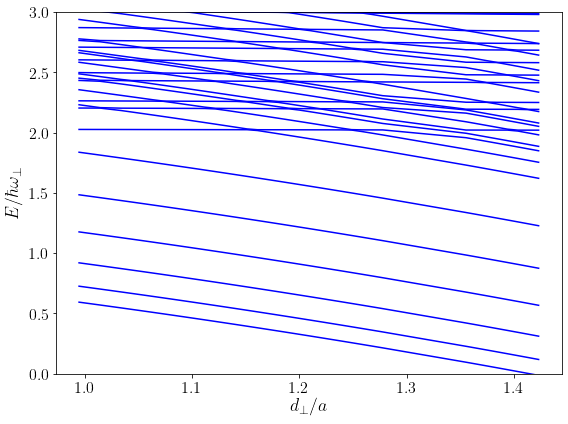

In [80]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 30):
    ax.plot(x, dic['nivel_{}'.format(i)]/wx, 'b')
ax.set_ylim(0, 3)
ax.set_xlabel('$d_{\perp}/a$')
ax.set_ylabel('$E/\hbar \omega_{\perp}$')
plt.tight_layout()
#fig.savefig('General_figures/Ix4993_Iy4993_Iz50/Ix4993_Iy4993_Iz50_Easc.png', dpi=200)
plt.show()

# Crosses

In [150]:
%matplotlib

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


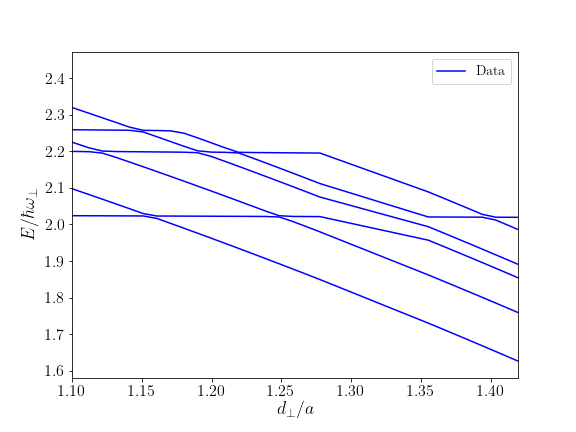

In [206]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos + 6, least_bound_pos + 12):
    ax2.plot(x, dic['nivel_{}'.format(i)]/wx, 'b')
#ax2.set_ylim(2, 2.04)
ax2.set_xlim(1.1, 1.42)
ax2.set_xlabel('$d_{\perp}/a$')
ax2.set_ylabel('$E/\hbar \omega_{\perp}$')
ax2.legend(['Data'], fontsize=14)
plt.show()

<IPython.core.display.Javascript object>


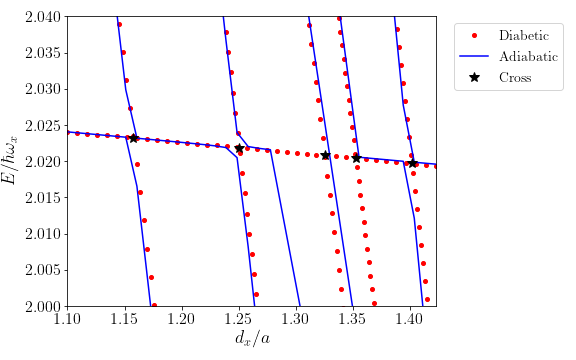

In [195]:
fig3, ax3 = plt.subplots(figsize=(8,5))
# nivel 1056:
f1056 = np.polyfit(x[x < 1.15], np.array(dic['nivel_1056'])[x < 1.15]/wx, deg=1)
x1056 = np.linspace(x[0], x[-1])
ax3.plot(x1056, np.polyval(f1056, x1056), 'ro', markersize=4, label='Diabetic')
ax3.plot(x, dic['nivel_1056']/wx, 'b', label='Adiabatic')

# nivel 1057:
f1057 = np.polyfit(x[(x > 1) & (x < 1.16)], np.array(dic['nivel_1057'])[(x > 1) & (x < 1.16)]/wx, deg=1)
x1057 = np.linspace(1, 1.3, num=100)
ax3.plot(x1057, np.polyval(f1057, x1057), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1057']/wx, 'b')

# nivel 1058:
f1058 = np.polyfit(x[(x > 1.12) & (x < 1.25)], np.array(dic['nivel_1058'])[(x > 1.12) & (x < 1.25)]/wx, deg=1)
x1058 = np.linspace(1.2, 1.3, num=50)
ax3.plot(x1058, np.polyval(f1058, x1058), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1058']/wx, 'b')

# nivel 1059:
f1059 = np.polyfit(x[(x > 1.19)], np.array(dic['nivel_1059'])[(x > 1.19)]/wx, deg=1)
x1059 = np.linspace(1, 1.4, num=200)
ax3.plot(x1059, np.polyval(f1059, x1059), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1059']/wx, 'b')

# nivel 1060:
f1060 = np.polyfit(x[(x > 1.21) & (x < 1.36)], np.array(dic['nivel_1060'])[(x > 1.21) & (x < 1.36)]/wx, deg=1)
x1060 = np.linspace(1.3, 1.4, num=70)
ax3.plot(x1060, np.polyval(f1060, x1060), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1060']/wx, 'b')

# nivel 1061:
f1061 = np.polyfit(x[(x > 1.27) & (x < 1.40)], np.array(dic['nivel_1061'])[(x > 1.27) & (x < 1.40)]/wx, deg=1)
x1061 = np.linspace(1.3, 1.42, num=70)
ax3.plot(x1061, np.polyval(f1061, x1061), 'ro', markersize=4)
ax3.plot(x, dic['nivel_1061']/wx, 'b')

# Crosses:
##########
ax3.plot(cross_points(f1056, f1057), np.polyval(f1056, cross_points(f1056, f1057)), 'k*', markersize=10, label='Cross')
ax3.plot(cross_points(f1056, f1058), np.polyval(f1056, cross_points(f1056, f1058)), 'k*', markersize=10)
ax3.plot(cross_points(f1056, f1059), np.polyval(f1056, cross_points(f1056, f1059)), 'k*', markersize=10)
ax3.plot(cross_points(f1056, f1060), np.polyval(f1056, cross_points(f1056, f1060)), 'k*', markersize=10)
ax3.plot(cross_points(f1056, f1061), np.polyval(f1056, cross_points(f1056, f1061)), 'k*', markersize=10)

ax3.set_xlabel('$d_{x}/a$')
ax3.set_ylabel('$E/\hbar \omega_{x}$')
ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.set_ylim(2, 2.04)
ax3.set_xlim(1.1, x[0])
plt.tight_layout()
fig3.savefig('General_figures/Ix4993_Iy4993_Iz50/Ix5503_Iy4993_Iz50_Easc_Interpolation.png', dpi=200)

In [196]:
print(f'''Crosses between (x, E):
* 1056-1057: ({cross_points(f1056, f1057)}, {np.polyval(f1056, cross_points(f1056, f1057))})
* 1056-1058: ({cross_points(f1056, f1058)}, {np.polyval(f1056, cross_points(f1056, f1058))})
* 1056-1059: ({cross_points(f1056, f1059)}, {np.polyval(f1056, cross_points(f1056, f1059))})
* 1056-1060: ({cross_points(f1056, f1060)}, {np.polyval(f1056, cross_points(f1056, f1060))})
* 1056-1061: ({cross_points(f1056, f1061)}, {np.polyval(f1056, cross_points(f1056, f1061))})''')

Crosses between (x, E):
* 1056-1057: (1.157752127486354, 2.0232198905313243)
* 1056-1058: (1.2504547093556888, 2.0218877459106106)
* 1056-1059: (1.3254575579631045, 2.020809948083454)
* 1056-1060: (1.3526314101816925, 2.0204194573298295)
* 1056-1061: (1.4016977199649654, 2.019714369949111)


In [205]:
print(f"ICIR: asc/dy = {1/cross_points(f1056, f1058)} and {1/cross_points(f1056, f1061)}")

ICIR: asc/dy = 0.7997090918352905 and 0.7134205797416824
